In [123]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

1. Загрузите данные по вариантам в ноутбук. Загружаем данные из Excel файла

In [3]:
df = pd.read_excel('Вариант 1.xlsx', skiprows=2, skipfooter=1)

2. Сделайте описательную статистику полученных данных. Получаем описательную статистику для всех количественных столбцов

In [4]:
desc_stats = df.describe()
print(desc_stats)

                 №      № школы  Номер варианта  Устная часть  Первичный балл  \
count  3048.000000  3048.000000     3048.000000           0.0     3048.000000   
mean   1524.500000   138.753281      340.787730           NaN       43.573491   
std     880.026136    41.793413       39.077186           NaN        8.931816   
min       1.000000   104.000000      101.000000           NaN        8.000000   
25%     762.750000   126.000000      339.000000           NaN       38.000000   
50%    1524.500000   144.000000      342.000000           NaN       45.000000   
75%    2286.250000   148.000000      346.000000           NaN       50.000000   
max    3048.000000  1106.000000      706.000000           NaN       58.000000   

              Балл  Минимальный балл  
count  3048.000000            3048.0  
mean     72.769029              24.0  
std      13.664908               0.0  
min      20.000000              24.0  
25%      64.000000              24.0  
50%      72.000000              24.0

3. Найдите процент учащихся, выполнивших работу ниже среднего. Вычисляем среднее значение для столбца "Балл"

In [9]:
mean_score = df['Балл'].mean()

# отфильтровываем строки с баллом ниже среднего
filtered_df = df[df['Балл'] < mean_score]

# вычисляем процент отфильтрованных строк
round(len(filtered_df) / len(df) * 100,2)

51.28

4. Найти процент учащихся не сдавших экзамен. Отфильтровываем строки с баллом ниже значения столбца "Минимальный балл"

In [10]:
filtered_df = df[df['Балл'] < df['Минимальный балл']]

# вычисляем процент отфильтрованных строк
round(len(filtered_df) / len(df) * 100,2)

0.13

5. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен. Отфильтровываем строки с баллом ниже значения столбца "Минимальный балл"

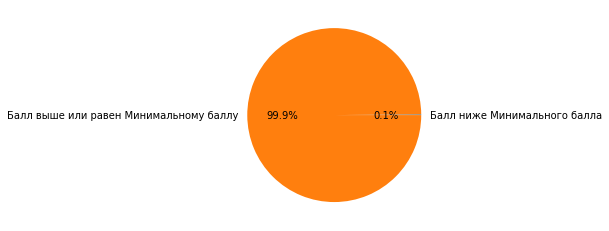

In [11]:
below_min_df = df[df['Балл'] < df['Минимальный балл']]

# отфильтровываем строки с баллом выше или равным значению столбца "Минимальный балл"
above_min_df = df[df['Балл'] >= df['Минимальный балл']]

# создаем список значений для круговой диаграммы
values = [len(below_min_df), len(above_min_df)]

# создаем список меток для круговой диаграммы
labels = ['Балл ниже Минимального балла', 'Балл выше или равен Минимальному баллу']

# строим круговую диаграмму
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

6. Постройте ядерную оценку плотности распределению баллов за экзамен.

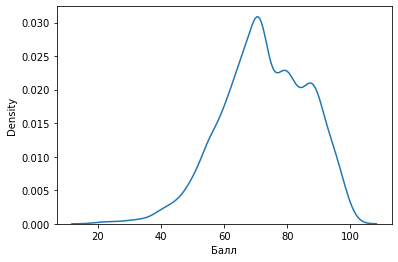

In [12]:
sns.kdeplot(df['Балл'])
plt.show()

In [13]:
# 7 Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».
# находим значение первой строки столбца "Минимальный балл"
min_score = df.loc[0, 'Минимальный балл']

# отфильтровываем строки с баллом ниже значения первой строки столбца "Минимальный балл"
below_min_df = df[df['Балл'] < min_score]

# находим процентное соотношение строк с баллом ниже значения первой строки столбца "Минимальный балл"
below_min_percent = len(below_min_df) / len(df) * 100

# отфильтровываем строки с баллом от значения первой строки столбца "Минимальный балл" до 70
range1_df = df[(df['Балл'] >= min_score) & (df['Балл'] < 70)]

# находим процентное соотношение строк с баллом в диапазоне от значения первой строки столбца "Минимальный балл" до 70
range1_percent = len(range1_df) / len(df) * 100

# отфильтровываем строки с баллом от 71 до 90
range2_df = df[(df['Балл'] >= 71) & (df['Балл'] <= 90)]

# находим процентное соотношение строк с баллом в диапазоне от 71 до 90
range2_percent = len(range2_df) / len(df) * 100

# отфильтровываем строки с баллом от 91 до 100
range3_df = df[(df['Балл'] >= 91) & (df['Балл'] <= 100)]

# находим процентное соотношение строк с баллом в диапазоне от 91 до 100
range3_percent = len(range3_df) / len(df) * 100

# выводим результаты на экран
print(f"Балл ниже минимального балла: {below_min_percent:.2f}% (неудовлетворительно)")
print(f"Балл от {min_score} до 70: {range1_percent:.2f}% (удовлетворительно)")
print(f"Балл от 71 до 90: {range2_percent:.2f}% (хорошо)")
print(f"Балл от 91 до 100: {range3_percent:.2f}% (отлично)")


Балл ниже минимального балла: 0.13% (неудовлетворительно)
Балл от 24 до 70: 38.98% (удовлетворительно)
Балл от 71 до 90: 46.39% (хорошо)
Балл от 91 до 100: 10.76% (отлично)


In [15]:
# 8 Какое процентное соотношение юношей и девушек писало данный экзамен?
counts = df['Пол'].value_counts()
round(counts / len(df) * 100,2)

Ж    57.97
М    42.03
Name: Пол, dtype: float64

In [16]:
# 9 Сколько школ принимало участие в экзамене?
df['№ школы'].nunique()

24

In [24]:
# 10 Сколько всего заданий с кратким ответом? С развернутым ответом?
short_answer = df.at[0, 'Задания с кратким ответом']
length_short_answer = len(short_answer)
print(f"{length_short_answer} заданий с кратким ответом")

long_answer = df.at[0, 'Задания с развёрнутым ответом']
length_long_answer = len(re.sub(r'\([^()]*\)', '', long_answer))
print(f"{length_long_answer} заданий с развернутым ответом")

25 заданий с кратким ответом
12 заданий с развернутым ответом
3048


11. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В, ... Вк Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

Выполненным заданием считается задание, где кол-во баллов, полученных за задачу, превышает ноль и не равно минусу.

In [87]:
_ = df["Задания с кратким ответом"]
print("№ задания: % невыполненных / % выполненных")
for i in range(length_short_answer):
    percentage = _.str[i].isin(['0', '-']).sum()/_.size
    print(f"Задание №{i}:",round(percentage*100, 2),"/",round(1 - percentage,2)*100)

№ задания: % невыполненных / % выполненных
Задание №0: 1.31 / 99.0
Задание №1: 7.12 / 93.0
Задание №2: 12.66 / 87.0
Задание №3: 22.7 / 77.0
Задание №4: 41.04 / 59.0
Задание №5: 9.38 / 91.0
Задание №6: 4.95 / 95.0
Задание №7: 24.41 / 76.0
Задание №8: 15.88 / 84.0
Задание №9: 3.12 / 97.0
Задание №10: 6.82 / 93.0
Задание №11: 24.48 / 76.0
Задание №12: 16.86 / 83.0
Задание №13: 29.82 / 70.0
Задание №14: 2.4 / 98.0
Задание №15: 31.04 / 69.0
Задание №16: 32.78 / 67.0
Задание №17: 25.82 / 74.0
Задание №18: 30.64 / 69.0
Задание №19: 17.26 / 83.0
Задание №20: 28.15 / 72.0
Задание №21: 51.94 / 48.0
Задание №22: 23.46 / 77.0
Задание №23: 75.23 / 25.0
Задание №24: 4.56 / 95.0


12. Аналогично и с типом С (ответы с развернутым ответом)

Выполненным заданием считается задание, где кол-во баллов, полученных за задачу, превышает ноль.

In [89]:
_ = df["Задания с развёрнутым ответом"]
print("№ задания: % невыполненных / % выполненных")
for i in range(length_long_answer*4):
    if i%4==0:
        percentage = _.str[i].isin(['0']).sum()/_.size
        print(f"Задание №{i}: ",round(percentage*100, 2),"/",round(1 - percentage,2)*100)

№ задания: % невыполненных / % выполненных
Задание №0:  3.25 / 97.0
Задание №4:  5.28 / 95.0
Задание №8:  5.54 / 94.0
Задание №12:  5.74 / 94.0
Задание №16:  3.54 / 96.0
Задание №20:  2.56 / 97.0
Задание №24:  7.61 / 92.0
Задание №28:  18.5 / 81.0
Задание №32:  15.81 / 84.0
Задание №36:  18.27 / 82.0
Задание №40:  2.0 / 98.0
Задание №44:  15.45 / 85.0


13. Сделайте анализ по двум школам:

i. по всем выполненным заданиям типа В.

ii. по заданиям типа С больше 50%.

iii. по среднему баллу юношей и девушек.


In [126]:
A, B = 148, 152
score = df["Балл"][2:]
school_data = df["№ школы"][2:]
gender_data = df["Пол"][2:]

school_A_male_score = []
school_A_female_score = []

school_B_male_score = []
school_B_female_score = []

for i in range(2, len(score)):
    if school_data[i] == 148:
        if gender_data[i] == "М":
           school_A_male_score.append(score[i])
        if gender_data[i] == "Ж":
            school_A_female_score.append(score[i])
    if school_data[i] == 152:
        if gender_data[i] == "М":
            school_B_male_score.append(score[i])
        if gender_data[i] == "Ж":
            school_B_female_score.append(score[i])


print(np.mean(school_A_male_score))
print(np.mean(school_A_female_score))

print(np.mean(school_B_male_score))
print(np.mean(school_B_female_score))

68.5034965034965
75.74585635359117
64.36241610738254
73.3021978021978


14. Для каждого задания добавьте соответствующий раздел в ноутбук и текстовые пояснения.